In [13]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import time

In [142]:
# Initialize fitness function object using coords_list
# Knapsack problem of max weight of 50, max volume of 50 and 40 items
np.random.seed(42)
n_location = 20
coords_list = np.random.randint(0, 100, size=(n_location, 2)).tolist()

fitness_coords = mlrose.TravellingSales(coords = coords_list)

In [143]:
# Define optimization problem object
problem_length = n_location
problem = mlrose.TSPOpt(length=n_location, fitness_fn=fitness_coords, maximize=False)
max_iters = 1000
max_attempts = 100

In [144]:
# HC
best_state, best_fitness, fitness_curve_RHC_0 = mlrose.random_hill_climb(problem, max_attempts=max_attempts,
                                                                         max_iters=max_iters,restarts=0,
                                                                         init_state=None, curve=True, random_state=42)

In [145]:
# SA
schedule = mlrose.GeomDecay(init_temp=10.0, decay=0.999, min_temp=0.001)
best_state, best_fitness, fitness_curve_SA_10_999 = mlrose.simulated_annealing(problem, schedule=schedule,
                                                                 max_attempts=max_attempts, max_iters=max_iters, 
                                                                 init_state=None, curve=True, random_state=42)
schedule = mlrose.GeomDecay(init_temp=10.0, decay=0.99, min_temp=0.001)
best_state, best_fitness, fitness_curve_SA_10_99 = mlrose.simulated_annealing(problem, schedule=schedule,
                                                                 max_attempts=max_attempts, max_iters=max_iters, 
                                                                 init_state=None, curve=True, random_state=42)
schedule = mlrose.GeomDecay(init_temp=10.0, decay=0.9, min_temp=0.001)
best_state, best_fitness, fitness_curve_SA_10_9 = mlrose.simulated_annealing(problem, schedule=schedule,
                                                                 max_attempts=max_attempts, max_iters=max_iters, 
                                                                 init_state=None, curve=True, random_state=42)
schedule = mlrose.GeomDecay(init_temp=10.0, decay=0.5, min_temp=0.001)
best_state, best_fitness, fitness_curve_SA_10_8 = mlrose.simulated_annealing(problem, schedule=schedule,
                                                                 max_attempts=max_attempts, max_iters=max_iters, 
                                                                 init_state=None, curve=True, random_state=42)
schedule = mlrose.GeomDecay(init_temp=1000.0, decay=0.99, min_temp=0.001)
best_state, best_fitness, fitness_curve_SA_1000_9 = mlrose.simulated_annealing(problem, schedule=schedule,
                                                                 max_attempts=max_attempts, max_iters=max_iters, 
                                                                 init_state=None, curve=True, random_state=42)
schedule = mlrose.GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001)
best_state, best_fitness, fitness_curve_SA_1_9 = mlrose.simulated_annealing(problem, schedule=schedule,
                                                                 max_attempts=max_attempts, max_iters=max_iters, 
                                                                 init_state=None, curve=True, random_state=42)

In [146]:
# GA
best_state, best_fitness, fitness_curve_GA_10_001 = mlrose.genetic_alg(problem, pop_size=10, mutation_prob=0.01, 
                                                             max_attempts=max_attempts, max_iters=max_iters, curve=True, 
                                                             random_state=42)
best_state, best_fitness, fitness_curve_GA_10_01 = mlrose.genetic_alg(problem, pop_size=10, mutation_prob=0.1, 
                                                             max_attempts=max_attempts, max_iters=max_iters, curve=True, 
                                                             random_state=42)
print(1)
best_state, best_fitness, fitness_curve_GA_10_02 = mlrose.genetic_alg(problem, pop_size=10, mutation_prob=0.2, 
                                                             max_attempts=max_attempts, max_iters=max_iters, curve=True, 
                                                             random_state=42)
print(2)
best_state, best_fitness, fitness_curve_GA_10_05 = mlrose.genetic_alg(problem, pop_size=10, mutation_prob=0.5, 
                                                             max_attempts=max_attempts, max_iters=max_iters, curve=True, 
                                                             random_state=42)
print(3)
best_state, best_fitness, fitness_curve_GA_20_001 = mlrose.genetic_alg(problem, pop_size=10, mutation_prob=0.01, 
                                                             max_attempts=max_attempts, max_iters=max_iters, curve=True, 
                                                             random_state=42)
best_state, best_fitness, fitness_curve_GA_20_01 = mlrose.genetic_alg(problem, pop_size=20, mutation_prob=0.1, 
                                                             max_attempts=max_attempts, max_iters=max_iters, curve=True, 
                                                             random_state=42)
print(4)
best_state, best_fitness, fitness_curve_GA_20_02 = mlrose.genetic_alg(problem, pop_size=20, mutation_prob=0.2, 
                                                             max_attempts=max_attempts, max_iters=max_iters, curve=True, 
                                                             random_state=42)
print(5)
best_state, best_fitness, fitness_curve_GA_20_05 = mlrose.genetic_alg(problem, pop_size=20, mutation_prob=0.5, 
                                                             max_attempts=max_attempts, max_iters=max_iters, curve=True, 
                                                             random_state=42)
print(6)

1
2
3
4
5
6


In [148]:
# MIMIC
best_state, best_fitness, fitness_curve_MIMIC_10_01 = mlrose.mimic(problem, pop_size=10, keep_pct=0.1,
                                                             max_attempts=max_attempts, max_iters=max_iters/20,
                                                             curve=True, random_state=None, fast_mimic=False)
print(1)
best_state, best_fitness, fitness_curve_MIMIC_10_02 = mlrose.mimic(problem, pop_size=10, keep_pct=0.2,
                                                             max_attempts=max_attempts, max_iters=max_iters/20,
                                                             curve=True, random_state=None, fast_mimic=False)
print(2)
best_state, best_fitness, fitness_curve_MIMIC_10_05 = mlrose.mimic(problem, pop_size=10, keep_pct=0.5,
                                                             max_attempts=max_attempts, max_iters=max_iters/20,
                                                             curve=True, random_state=None, fast_mimic=False)
print(3)
best_state, best_fitness, fitness_curve_MIMIC_20_01 = mlrose.mimic(problem, pop_size=20, keep_pct=0.1,
                                                             max_attempts=max_attempts, max_iters=max_iters/20,
                                                             curve=True, random_state=None, fast_mimic=False)
print(4)
best_state, best_fitness, fitness_curve_MIMIC_20_02 = mlrose.mimic(problem, pop_size=20, keep_pct=0.2,
                                                             max_attempts=max_attempts, max_iters=max_iters/20,
                                                             curve=True, random_state=None, fast_mimic=False)
print(5)
best_state, best_fitness, fitness_curve_MIMIC_20_05 = mlrose.mimic(problem, pop_size=20, keep_pct=0.5,
                                                             max_attempts=max_attempts, max_iters=max_iters/20,
                                                             curve=True, random_state=None, fast_mimic=False)
print(6)

1
2
3
4
5
6


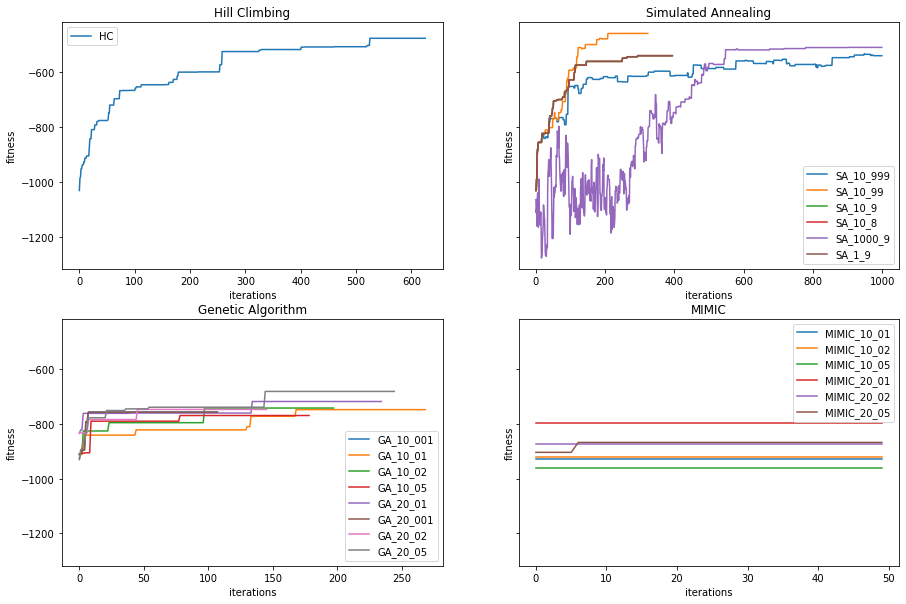

In [153]:
fig, ([ax0, ax1], [ax2, ax3]) = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), sharey=True)

ylim = 1000

ax0.plot(fitness_curve_RHC_0, label='HC')
ax0.set_xlabel("iterations")
ax0.set_ylabel("fitness")
ax0.legend()
ax0.set_title('Hill Climbing')
#ax0.set_ylim([0, ylim])

ax1.plot(fitness_curve_SA_10_999, label='SA_10_999')
ax1.plot(fitness_curve_SA_10_99, label='SA_10_99')
ax1.plot(fitness_curve_SA_10_9, label='SA_10_9')
ax1.plot(fitness_curve_SA_10_8, label='SA_10_8')
ax1.plot(fitness_curve_SA_1000_9, label='SA_1000_9')
ax1.plot(fitness_curve_SA_1_9, label='SA_1_9')
ax1.set_xlabel("iterations")
ax1.set_ylabel("fitness")
ax1.legend()
ax1.set_title('Simulated Annealing')
#ax1.set_ylim([0, ylim])

ax2.plot(fitness_curve_GA_10_001, label='GA_10_001')
ax2.plot(fitness_curve_GA_10_01, label='GA_10_01')
ax2.plot(fitness_curve_GA_10_02, label='GA_10_02')
ax2.plot(fitness_curve_GA_10_05, label='GA_10_05')
ax2.plot(fitness_curve_GA_20_01, label='GA_20_01')
ax2.plot(fitness_curve_GA_20_001, label='GA_20_001')
ax2.plot(fitness_curve_GA_20_02, label='GA_20_02')
ax2.plot(fitness_curve_GA_20_05, label='GA_20_05')
ax2.set_xlabel("iterations")
ax2.set_ylabel("fitness")
ax2.legend()
ax2.set_title('Genetic Algorithm')
#ax2.set_ylim([0, ylim])

ax3.plot(fitness_curve_MIMIC_10_01, label='MIMIC_10_01')
ax3.plot(fitness_curve_MIMIC_10_02, label='MIMIC_10_02')
ax3.plot(fitness_curve_MIMIC_10_05, label='MIMIC_10_05')
ax3.plot(fitness_curve_MIMIC_20_01, label='MIMIC_20_01')
ax3.plot(fitness_curve_MIMIC_20_02, label='MIMIC_20_02')
ax3.plot(fitness_curve_MIMIC_20_05, label='MIMIC_20_05')
#ax3.plot(fitness_curve_MIMIC_100_01, label='MIMIC_100_01')
#ax3.plot(fitness_curve_MIMIC_100_02, label='MIMIC_100_02')
#ax3.plot(fitness_curve_MIMIC_100_05, label='MIMIC_100_05')
ax3.set_xlabel("iterations")
ax3.set_ylabel("fitness")
ax3.legend()
ax3.set_title('MIMIC')
#ax3.set_ylim([0, ylim])
plt.savefig('TSP1.jpg')

In [150]:
import time
# RHC
start = time.clock()
best_state, best_fitness_RHC, fitness_curve_RHC = mlrose.random_hill_climb(problem, max_attempts=max_attempts, 
                                                                max_iters=max_iters,
                                                                restarts=5, init_state=None, curve=True,
                                                                random_state=1)
end = time.clock()
fitness_time_RHC = end - start

# SA
start = time.clock()
schedule = mlrose.GeomDecay(init_temp=10000.0, decay=0.9, min_temp=0.001)
best_state, best_fitness_SA, fitness_curve_SA = mlrose.simulated_annealing(problem, schedule=schedule,
                                                                 max_attempts=max_attempts, max_iters=max_iters, 
                                                                 init_state=None, curve=True, random_state=42)
end = time.clock()
fitness_time_SA = end - start

# GA
start = time.clock()
best_state, best_fitness_GA, fitness_curve_GA = mlrose.genetic_alg(problem, pop_size=100, mutation_prob=0.9, 
                                                             max_attempts=max_attempts, max_iters=max_iters, curve=True, 
                                                             random_state=42)
end = time.clock()
fitness_time_GA = end - start

# MIMIC
start = time.clock()
best_state, best_fitness_MIMIC, fitness_curve_MIMIC = mlrose.mimic(problem, pop_size=1, keep_pct=0.5,
                                                             max_attempts=max_attempts, max_iters=max_iters/20,
                                                             curve=True, random_state=None, fast_mimic=False)
end = time.clock()
fitness_time_MIMIC = end - start


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if sys.path[0] == '':
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
D:\Pr

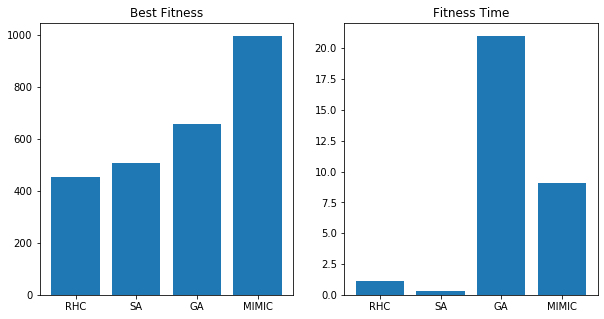

In [152]:
best_fitness = {'RHC': best_fitness_RHC, 'SA': best_fitness_SA, 'GA': best_fitness_GA, 'MIMIC': best_fitness_MIMIC}
fit_time = {'RHC': fitness_time_RHC, 'SA': fitness_time_SA, 'GA': fitness_time_GA, 'MIMIC': fitness_time_MIMIC}
names = list(best_fitness.keys())
fitness = list(best_fitness.values())
time = list(fit_time.values())

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
#axs[0].set_ylim([0, ylim])
axs[0].bar(names, fitness)
axs[0].set_title('Best Fitness')

axs[1].bar(names, time)
axs[1].set_title('Fitness Time')
plt.savefig('TSP2.jpg')